In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import data frame containing the amino acids' masses
mass_df = pd.read_csv("masses_df.csv")

In [4]:
mass_dict = mass_df.iloc[:, 2:].set_index('1-letter code').to_dict('index')

In [54]:
seq = ('''MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKALVLIAFAQYLQQCPF\
EDHVKLVNEVTEFAKTCVADESAENCDKSLHTLFGDKLCTVATLRETYGEMADCCAKQEP\
ERNECFLQHKDDNPNLPRLVRPEVDVMCTAFHDNEETFLKKYLYEIARRHPYFYAPELLF\
FAKRYKAAFTECCQAADKAACLLPKLDELRDEGKASSAKQRLKCASLQKFGERAFKAWAV\
ARLSQRFPKAEFAEVSKLVTDLTKVHTECCHGDLLECADDRADLAKYICENQDSISSKLK\
ECCEKPLLEKSHCIAEVENDEMPADLPSLAADFVESKDVCKNYAEAKDVFLGMFLYEYAR\
RHPDYSVVLLLRLAKTYETTLEKCCAAADPHECYAKVFDEFKPLVEEPQNLIKQNCELFE\
QLGEYKFQNALLVRYTKKVPQVSTPTLVEVSRNLGKVGSKCCKHPEAKRMPCAEDYLSVV\
LNQLCVLHEKTPVSDRVTKCCTESLVNRRPCFSALEVDETYVPKEFNAETFTFHADICTL\
SEKERQIKKQTALVELVKHKPKATKEQLKAVMDDFAAFVEKCCKADDKETCFAEEGKKLV\
AASQAALGL''')

In [56]:
seq

'MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKALVLIAFAQYLQQCPFEDHVKLVNEVTEFAKTCVADESAENCDKSLHTLFGDKLCTVATLRETYGEMADCCAKQEPERNECFLQHKDDNPNLPRLVRPEVDVMCTAFHDNEETFLKKYLYEIARRHPYFYAPELLFFAKRYKAAFTECCQAADKAACLLPKLDELRDEGKASSAKQRLKCASLQKFGERAFKAWAVARLSQRFPKAEFAEVSKLVTDLTKVHTECCHGDLLECADDRADLAKYICENQDSISSKLKECCEKPLLEKSHCIAEVENDEMPADLPSLAADFVESKDVCKNYAEAKDVFLGMFLYEYARRHPDYSVVLLLRLAKTYETTLEKCCAAADPHECYAKVFDEFKPLVEEPQNLIKQNCELFEQLGEYKFQNALLVRYTKKVPQVSTPTLVEVSRNLGKVGSKCCKHPEAKRMPCAEDYLSVVLNQLCVLHEKTPVSDRVTKCCTESLVNRRPCFSALEVDETYVPKEFNAETFTFHADICTLSEKERQIKKQTALVELVKHKPKATKEQLKAVMDDFAAFVEKCCKADDKETCFAEEGKKLVAASQAALGL'

In [57]:
def mass_calculator(seq, method = 'average'):
    
    # Set mass to zero
    mass = 0
    
    # Evaluates the mass method
    if method == 'average':
        #Iterate through the imput sequence
        for aa in seq:
            # Check if the aa is in the dictionary
            if aa in mass_dict:
                # Add the mass of the aa to the mass variable
                mass += mass_dict[aa]['Average Mass']
            else:
                print('There is an unrecognized amino acid (' + str(aa) + ') in the sequence')
            
    elif method == 'monoisotopic':
        for aa in seq:
            if aa in mass_dict:
                mass += mass_dict[aa]['Monoisotopic Mass']
            else:
                print('There is an unrecognized amino acid (' + str(aa) +') in the sequence')
            
    else:
        print('Wrong method!')
        
    return float(mass)

In [58]:
def aa_distribution(seq):
    amino = []
    counts = []
    # Iterate through dict and append and count the number of aa in the sequence
    for aa in mass_dict:
        amino.append(aa)
        counts.append(seq.count(aa))
    
    plt.bar(x = amino, height = counts)
    plt.ylabel('Count')
    plt.show
              

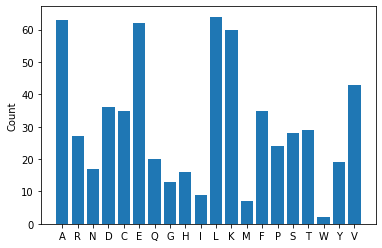

In [59]:
aa_distribution(seq)

In [60]:
def charge(seq, exclude = None, polarity = None):
    pos = 0
    neg = 0
    for aa in seq:
        if aa == 'R' or aa == 'K' or aa == 'H':
            pos += 1
            if aa == exclude:
                pos -= 1
            
        elif aa == 'D' or aa == 'E':
            neg += 1
            if aa == exclude:
                neg -= 1
    
    if polarity == 'pos':
        return pos
    elif polarity == 'neg':
        return -neg
    elif polarity is None:
        return pos, -neg

In [61]:
charge(seq, exclude = 'H')

(87, -98)

In [68]:
def peptides(seq, enzyme = 'Trypsin'):
    peptides = []
    for i in range(len(seq)):
        if seq[i] == 'K' or seq[i] == 'R':
            peptides.append(seq[:i+1])
            peptides.append(seq[i+1:])
    return peptides
            
        

In [69]:
peptides(seq)

['MK',
 'WVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKALVLIAFAQYLQQCPFEDHVKLVNEVTEFAKTCVADESAENCDKSLHTLFGDKLCTVATLRETYGEMADCCAKQEPERNECFLQHKDDNPNLPRLVRPEVDVMCTAFHDNEETFLKKYLYEIARRHPYFYAPELLFFAKRYKAAFTECCQAADKAACLLPKLDELRDEGKASSAKQRLKCASLQKFGERAFKAWAVARLSQRFPKAEFAEVSKLVTDLTKVHTECCHGDLLECADDRADLAKYICENQDSISSKLKECCEKPLLEKSHCIAEVENDEMPADLPSLAADFVESKDVCKNYAEAKDVFLGMFLYEYARRHPDYSVVLLLRLAKTYETTLEKCCAAADPHECYAKVFDEFKPLVEEPQNLIKQNCELFEQLGEYKFQNALLVRYTKKVPQVSTPTLVEVSRNLGKVGSKCCKHPEAKRMPCAEDYLSVVLNQLCVLHEKTPVSDRVTKCCTESLVNRRPCFSALEVDETYVPKEFNAETFTFHADICTLSEKERQIKKQTALVELVKHKPKATKEQLKAVMDDFAAFVEKCCKADDKETCFAEEGKKLVAASQAALGL',
 'MKWVTFISLLFLFSSAYSR',
 'GVFRRDAHKSEVAHRFKDLGEENFKALVLIAFAQYLQQCPFEDHVKLVNEVTEFAKTCVADESAENCDKSLHTLFGDKLCTVATLRETYGEMADCCAKQEPERNECFLQHKDDNPNLPRLVRPEVDVMCTAFHDNEETFLKKYLYEIARRHPYFYAPELLFFAKRYKAAFTECCQAADKAACLLPKLDELRDEGKASSAKQRLKCASLQKFGERAFKAWAVARLSQRFPKAEFAEVSKLVTDLTKVHTECCHGDLLECADDRADLAKYICENQDSISSKLKECCEKPLLEKSHCIAEVENDEMPADLPSLAADFVESKDVCKNYAEAKDVFLGMFLYEYARRHPDYSVVLLLRLA